In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import random

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional


print(os.getcwd())

/home/jmmcaro/PythonDir/PythonEnv/QoX/code


In [2]:
df_init = pd.read_csv('../csv/S2_Rural.csv', sep=';')
print(df_init.head())
print(list(df_init.columns))

   time  10_validity  10_timeliness  10_recall  10_quantity  10_precision  \
0   500            1              1        1.0     1.000000      0.981154   
1  1000            1              1        1.0     0.994118      1.000000   
2  1500            1              1        1.0     0.905882      0.973087   
3  2000            1              1        1.0     0.864706      0.973087   
4  2500            1              1        1.0     0.911765      1.000000   

   10_detail  10_accuracy    10_QoI  10_ThBps  ...  19_ThBps    19_PDR  \
0          1            1  0.981154  1.000000  ...  1.000000  0.823600   
1          1            1  0.994118  1.000000  ...  0.888959  0.831604   
2          1            1  0.881503  0.931880  ...  1.000000  0.901376   
3          1            1  0.841434  0.847894  ...  0.855022  0.826415   
4          1            1  0.911765  0.855889  ...  0.970100  0.782809   

   19_Jitter  19_GWAv  19_Delay    19_QoE    19_QoD  19_thruthfullness  \
0   1.000000      

In [3]:
cols_GWAv = pd.DataFrame()
cols_Jitter = pd.DataFrame()
cols_Delay = pd.DataFrame()
cols_ThBps = pd.DataFrame()
cols_quantity = pd.DataFrame()
cols_PDR = pd.DataFrame()
cols_recall = pd.DataFrame()
cols_QoE = pd.DataFrame()


cols_GWAv = df_init[['10_GWAv','11_GWAv','12_GWAv','13_GWAv','14_GWAv','15_GWAv','16_GWAv','17_GWAv','18_GWAv','19_GWAv']]
cols_Jitter = df_init[['10_Jitter','11_Jitter','12_Jitter','13_Jitter','14_Jitter','15_Jitter','16_Jitter','17_Jitter','18_Jitter','19_Jitter']]
cols_Delay = df_init[['10_Delay','11_Delay','12_Delay','13_Delay','14_Delay','15_Delay','16_Delay','17_Delay','18_Delay','19_Delay']]
cols_ThBps = df_init[['10_ThBps','11_ThBps','12_ThBps','13_ThBps','14_ThBps','15_ThBps','16_ThBps','17_ThBps','18_ThBps','19_ThBps']]
cols_quantity = df_init[['10_quantity','11_quantity','12_quantity','13_quantity','14_quantity','15_quantity','16_quantity','17_quantity','18_quantity','19_quantity']]
cols_PDR = df_init[['10_PDR','11_PDR','12_PDR','13_PDR','14_PDR','15_PDR','16_PDR','17_PDR','18_PDR','19_PDR']]
cols_recall = df_init[['10_recall','11_recall','12_recall','13_recall','14_recall','15_recall','16_recall','17_recall','18_recall','19_recall']]
cols_QoE = df_init[['10_QoE','11_QoE','12_QoE','13_QoE','14_QoE','15_QoE','16_QoE','17_QoE','18_QoE','19_QoE']]

cols2 = ['GWAv', 'Jitter', 'Delay','ThBps','quantity','PDR','recall','Decision']

df2 = pd.DataFrame(columns=cols2)


In [4]:
aux0 = pd.Series(cols_GWAv['10_GWAv'])
aux1 = pd.Series(cols_GWAv['11_GWAv'])
aux2 = pd.Series(cols_GWAv['12_GWAv'])
aux3 = pd.Series(cols_GWAv['13_GWAv'])
aux4 = pd.Series(cols_GWAv['14_GWAv'])
aux5 = pd.Series(cols_GWAv['15_GWAv'])
aux6 = pd.Series(cols_GWAv['16_GWAv'])
aux7 = pd.Series(cols_GWAv['17_GWAv'])
aux8 = pd.Series(cols_GWAv['18_GWAv'])
aux9 = pd.Series(cols_GWAv['19_GWAv'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['GWAv'] = pd.Series(aux)

[1.         1.         1.         ... 1.         1.         0.99999999]


In [5]:
aux0 = pd.Series(cols_Jitter['10_Jitter'])
aux1 = pd.Series(cols_Jitter['11_Jitter'])
aux2 = pd.Series(cols_Jitter['12_Jitter'])
aux3 = pd.Series(cols_Jitter['13_Jitter'])
aux4 = pd.Series(cols_Jitter['14_Jitter'])
aux5 = pd.Series(cols_Jitter['15_Jitter'])
aux6 = pd.Series(cols_Jitter['16_Jitter'])
aux7 = pd.Series(cols_Jitter['17_Jitter'])
aux8 = pd.Series(cols_Jitter['18_Jitter'])
aux9 = pd.Series(cols_Jitter['19_Jitter'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['Jitter'] = pd.Series(aux)

[1.         1.         0.946581   ... 0.83244406 0.90703392 0.8578095 ]


In [6]:
aux0 = pd.Series(cols_Delay['10_Delay'])
aux1 = pd.Series(cols_Delay['11_Delay'])
aux2 = pd.Series(cols_Delay['12_Delay'])
aux3 = pd.Series(cols_Delay['13_Delay'])
aux4 = pd.Series(cols_Delay['14_Delay'])
aux5 = pd.Series(cols_Delay['15_Delay'])
aux6 = pd.Series(cols_Delay['16_Delay'])
aux7 = pd.Series(cols_Delay['17_Delay'])
aux8 = pd.Series(cols_Delay['18_Delay'])
aux9 = pd.Series(cols_Delay['19_Delay'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['Delay'] = pd.Series(aux)

[1.         1.         0.97974004 ... 0.77732748 0.78389232 0.86609526]


In [7]:
aux0 = pd.Series(cols_ThBps['10_ThBps'])
aux1 = pd.Series(cols_ThBps['11_ThBps'])
aux2 = pd.Series(cols_ThBps['12_ThBps'])
aux3 = pd.Series(cols_ThBps['13_ThBps'])
aux4 = pd.Series(cols_ThBps['14_ThBps'])
aux5 = pd.Series(cols_ThBps['15_ThBps'])
aux6 = pd.Series(cols_ThBps['16_ThBps'])
aux7 = pd.Series(cols_ThBps['17_ThBps'])
aux8 = pd.Series(cols_ThBps['18_ThBps'])
aux9 = pd.Series(cols_ThBps['19_ThBps'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['ThBps'] = pd.Series(aux)

[1.         1.         0.93188    ... 0.79775875 0.7410003  0.90856501]


In [8]:
aux0 = pd.Series(cols_quantity['10_quantity'])
aux1 = pd.Series(cols_quantity['11_quantity'])
aux2 = pd.Series(cols_quantity['12_quantity'])
aux3 = pd.Series(cols_quantity['13_quantity'])
aux4 = pd.Series(cols_quantity['14_quantity'])
aux5 = pd.Series(cols_quantity['15_quantity'])
aux6 = pd.Series(cols_quantity['16_quantity'])
aux7 = pd.Series(cols_quantity['17_quantity'])
aux8 = pd.Series(cols_quantity['18_quantity'])
aux9 = pd.Series(cols_quantity['19_quantity'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['quantity'] = pd.Series(aux)

[1.         0.99411765 0.90588235 ... 0.82653061 0.81122449 0.89285714]


In [9]:
aux0 = pd.Series(cols_PDR['10_PDR'])
aux1 = pd.Series(cols_PDR['11_PDR'])
aux2 = pd.Series(cols_PDR['12_PDR'])
aux3 = pd.Series(cols_PDR['13_PDR'])
aux4 = pd.Series(cols_PDR['14_PDR'])
aux5 = pd.Series(cols_PDR['15_PDR'])
aux6 = pd.Series(cols_PDR['16_PDR'])
aux7 = pd.Series(cols_PDR['17_PDR'])
aux8 = pd.Series(cols_PDR['18_PDR'])
aux9 = pd.Series(cols_PDR['19_PDR'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['PDR'] = pd.Series(aux)

[0.86158281 0.90750225 0.87762803 ... 0.84483352 0.86711531 0.83079134]


In [10]:
aux0 = pd.Series(cols_recall['10_recall'])
aux1 = pd.Series(cols_recall['11_recall'])
aux2 = pd.Series(cols_recall['12_recall'])
aux3 = pd.Series(cols_recall['13_recall'])
aux4 = pd.Series(cols_recall['14_recall'])
aux5 = pd.Series(cols_recall['15_recall'])
aux6 = pd.Series(cols_recall['16_recall'])
aux7 = pd.Series(cols_recall['17_recall'])
aux8 = pd.Series(cols_recall['18_recall'])
aux9 = pd.Series(cols_recall['19_recall'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['recall'] = pd.Series(aux)

[1.   1.   1.   ... 1.   1.   0.96]


In [11]:
aux0 = pd.Series(cols_QoE['10_QoE'])
aux1 = pd.Series(cols_QoE['11_QoE'])
aux2 = pd.Series(cols_QoE['12_QoE'])
aux3 = pd.Series(cols_QoE['13_QoE'])
aux4 = pd.Series(cols_QoE['14_QoE'])
aux5 = pd.Series(cols_QoE['15_QoE'])
aux6 = pd.Series(cols_QoE['16_QoE'])
aux7 = pd.Series(cols_QoE['17_QoE'])
aux8 = pd.Series(cols_QoE['18_QoE'])
aux9 = pd.Series(cols_QoE['19_QoE'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9],axis=0)
aux = np.array(aux)
print(aux)

df2['Decision'] = pd.Series(aux)

[0.86158281 0.90750224 0.75847123 ... 0.43611577 0.45685163 0.56079544]


In [12]:
print(df2)

       GWAv    Jitter     Delay     ThBps  quantity       PDR  recall  \
0       1.0  1.000000  1.000000  1.000000  1.000000  0.861583    1.00   
1       1.0  1.000000  1.000000  1.000000  0.994118  0.907502    1.00   
2       1.0  0.946581  0.979740  0.931880  0.905882  0.877628    1.00   
3       1.0  0.972999  0.943664  0.847894  0.864706  0.850449    1.00   
4       1.0  0.981547  0.897210  0.855889  0.911765  0.832732    1.00   
...     ...       ...       ...       ...       ...       ...     ...   
14395   1.0  0.819694  0.742565  0.705068  0.765306  0.803373    0.96   
14396   1.0  0.902494  0.917663  0.846650  0.821429  0.794394    1.00   
14397   1.0  0.832444  0.777327  0.797759  0.826531  0.844834    1.00   
14398   1.0  0.907034  0.783892  0.741000  0.811224  0.867115    1.00   
14399   1.0  0.857809  0.866095  0.908565  0.892857  0.830791    0.96   

       Decision  
0      0.861583  
1      0.907502  
2      0.758471  
3      0.662094  
4      0.627665  
...         ...

[6912, 520, 488, 1535, 3582, 3811, 8279, 9863, 434, 9195]
[2, 1, 5, 4, 4, 3, 2, 9, 2, 10]
-----------------------------
[11438, 6924, 5574, 4552, 2547, 3527, 12509, 5514, 1674, 1519]
[13, 20, 18, 16, 13, 17, 19, 14, 10, 12]
-----------------------------
[13223, 711, 11955, 7527, 8785]
[394, 249, 383, 376, 335]
-----------------------------


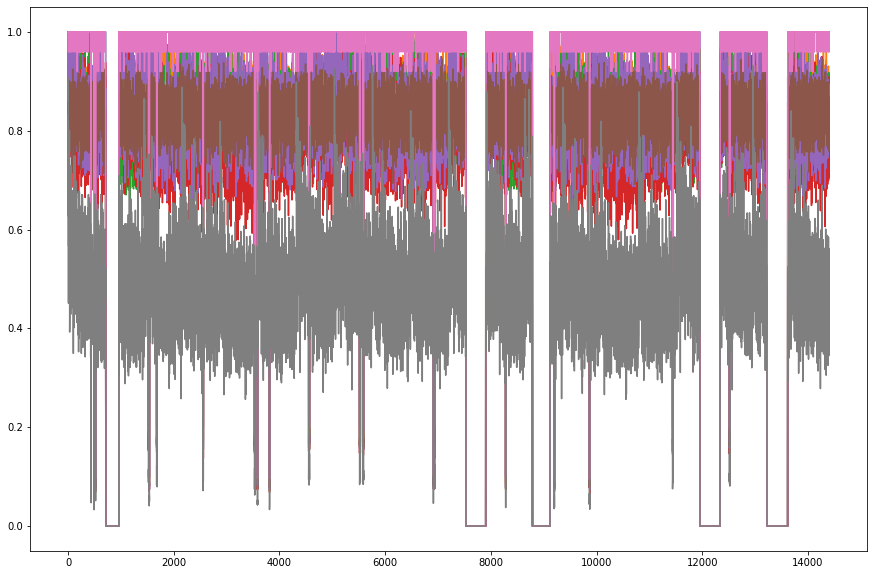

In [13]:
random.seed(42)

lent = df2['GWAv'].shape[0]

leng1 = [random.randint(1,10) for i in range(10)]
init1 = [random.randint(0,lent) for i in range(10)]


print(init1)
print(leng1)
print('-----------------------------')

leng2 = [random.randint(10,20) for i in range(10)]
init2 = [random.randint(0,lent) for i in range(10)]
print(init2)
print(leng2)
print('-----------------------------')


leng3 = [random.randint(200,500) for i in range(5)]
init3 = [random.randint(0,lent) for i in range(5)]
print(init3)
print(leng3)
print('-----------------------------')

for i in range(0,len(leng1)):
    df2[init1[i]:init1[i]+leng1[i]] = df2[init1[i]:init1[i]+leng1[i]] * 0.1;
    #print(df['QoE'][init1[i]:init1[i]+leng1[i]])
    
for i in range(0,len(leng2)):
    df2[init2[i]:init2[i]+leng2[i]] = df2[init2[i]:init2[i]+leng2[i]] * 0.2;
    #print(df['QoE'][init2[i]:init2[i]+leng2[i]])
    
for i in range(0,len(leng3)):
    df2[init3[i]:init3[i]+leng3[i]] = df2[init3[i]:init3[i]+leng3[i]] * 0;
    #print(df['QoE'][init2[i]:init2[i]+leng2[i]])

    
fig = plt.figure(figsize=(15,10))
plt.plot(df2)
plt.show()

In [14]:
from chefboost import Chefboost as chef
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score


In [15]:
for i in range(0,df2.shape[0]):
    if(df2['Decision'][i] >=0.8 and df2['Decision'][i] <=1):
        df2['Decision'][i] = 5
    if(df2['Decision'][i] <0.8 and df2['Decision'][i]>=0.6):
        df2['Decision'][i] = 4   
    if(df2['Decision'][i] <0.6 and df2['Decision'][i]>=0.4):
        df2['Decision'][i] = 3
    if(df2['Decision'][i] <0.4 and df2['Decision'][i]>=0.2):
        df2['Decision'][i] = 2
    if(df2['Decision'][i] <0.2 and df2['Decision'][i]>=0):
        df2['Decision'][i] = 1  
        

In [16]:
print(df2.columns)
df_decision = df2['Decision']
df2 = df2.drop(['Decision'],axis=1)
print(df2)




Index(['GWAv', 'Jitter', 'Delay', 'ThBps', 'quantity', 'PDR', 'recall',
       'Decision'],
      dtype='object')
       GWAv    Jitter     Delay     ThBps  quantity       PDR  recall
0       1.0  1.000000  1.000000  1.000000  1.000000  0.861583    1.00
1       1.0  1.000000  1.000000  1.000000  0.994118  0.907502    1.00
2       1.0  0.946581  0.979740  0.931880  0.905882  0.877628    1.00
3       1.0  0.972999  0.943664  0.847894  0.864706  0.850449    1.00
4       1.0  0.981547  0.897210  0.855889  0.911765  0.832732    1.00
...     ...       ...       ...       ...       ...       ...     ...
14395   1.0  0.819694  0.742565  0.705068  0.765306  0.803373    0.96
14396   1.0  0.902494  0.917663  0.846650  0.821429  0.794394    1.00
14397   1.0  0.832444  0.777327  0.797759  0.826531  0.844834    1.00
14398   1.0  0.907034  0.783892  0.741000  0.811224  0.867115    1.00
14399   1.0  0.857809  0.866095  0.908565  0.892857  0.830791    0.96

[14400 rows x 7 columns]


In [17]:
df2_train, df2_test, dec_train, dec_test = train_test_split(df2, df_decision, test_size=0.25, shuffle=False, random_state=42)


In [18]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf_train = clf.fit(df2_train, dec_train)
dec_test = dec_test.to_numpy();
yhat = clf_train.predict(df2_test)
print(yhat)


[5. 5. 5. ... 3. 3. 3.]


In [19]:
print(len(yhat))
print(len(dec_test))

comp = {'yhat': yhat, 'y_test': dec_test}
df_comp = pd.DataFrame(data=comp)
print(df_comp)

3600
3600
      yhat  y_test
0      5.0     5.0
1      5.0     5.0
2      5.0     5.0
3      4.0     4.0
4      5.0     5.0
...    ...     ...
3595   2.0     2.0
3596   3.0     3.0
3597   3.0     3.0
3598   3.0     3.0
3599   3.0     3.0

[3600 rows x 2 columns]


In [20]:
min = 0
count = 0;
notif_paper = []
notif2_paper = []

th = 0.5


for i in range(0,len(yhat)):
    #print([res_QoE['yhat'][i], res_QoE['y_test'][i]])
    if (i==0):
        notif_paper.append(0)
        notif2_paper.append(0)
    else:
        if(yhat[i] < dec_train[i-1]*th):
            notif_paper.append(1)
        else:
            notif_paper.append(0)
        
        if(dec_train[i] < dec_train[i-1]*th or dec_train[i] <=2):
            notif2_paper.append(1)
        else:
            notif2_paper.append(0)    



In [21]:
df_QoI = pd.DataFrame()
df_QoE = pd.DataFrame()
df_QoD = pd.DataFrame()
cols = ['QoE', 'QoI', 'QoD']
df = pd.DataFrame(columns=cols)
print(df)

Empty DataFrame
Columns: [QoE, QoI, QoD]
Index: []


In [22]:
df_QoI = df_init[['10_QoI','11_QoI','12_QoI','13_QoI','14_QoI','15_QoI','16_QoI','17_QoI','18_QoI','19_QoI']]
df_QoE = df_init[['10_QoE','11_QoE','12_QoE','13_QoE','14_QoE','15_QoE','16_QoE','17_QoE','18_QoE','19_QoE']]
df_QoD = df_init[['10_QoD','11_QoD','12_QoD','13_QoD','14_QoD','15_QoD','16_QoD','17_QoD','18_QoD','19_QoD']]

In [23]:
print(df_QoE)

       10_QoE    11_QoE    12_QoE    13_QoE    14_QoE    15_QoE    16_QoE  \
0    0.861583  0.879560  0.865184  0.888110  0.819160  0.878616  0.898742   
1    0.907502  0.846081  0.785157  0.828856  0.574951  0.845081  0.771039   
2    0.758471  0.764439  0.677423  0.740695  0.581733  0.813059  0.801418   
3    0.662094  0.728379  0.775893  0.800857  0.630893  0.660434  0.657650   
4    0.627665  0.873829  0.852168  0.813943  0.437784  0.800199  0.735216   
..        ...       ...       ...       ...       ...       ...       ...   
715  0.431180  0.378034  0.346438  0.498083  0.360114  0.390321  0.533765   
716  0.431584  0.407974  0.530209  0.620009  0.382912  0.358104  0.502316   
717  0.553483  0.475378  0.377159  0.446962  0.390657  0.524784  0.518091   
718  0.448299  0.343174  0.534052  0.408276  0.541430  0.406827  0.601980   
719  0.396302  0.407028  0.470023  0.421734  0.469747  0.416140  0.482499   

       17_QoE    18_QoE    19_QoE  
0    0.924349  0.931402  0.823600  
1  

In [24]:
aux0 = pd.Series(df_QoE['10_QoE'])
aux1 = pd.Series(df_QoE['11_QoE'])
aux2 = pd.Series(df_QoE['12_QoE'])
aux3 = pd.Series(df_QoE['13_QoE'])
aux4 = pd.Series(df_QoE['14_QoE'])
aux5 = pd.Series(df_QoE['15_QoE'])
aux6 = pd.Series(df_QoE['16_QoE'])
aux7 = pd.Series(df_QoE['17_QoE'])
aux8 = pd.Series(df_QoE['18_QoE'])
aux9 = pd.Series(df_QoE['19_QoE'])
aux10 = pd.Series(df_QoE['10_QoE'])
aux11 = pd.Series(df_QoE['11_QoE'])
aux12 = pd.Series(df_QoE['12_QoE'])
aux13 = pd.Series(df_QoE['13_QoE'])
aux14 = pd.Series(df_QoE['14_QoE'])
aux15 = pd.Series(df_QoE['15_QoE'])
aux16 = pd.Series(df_QoE['16_QoE'])
aux17 = pd.Series(df_QoE['17_QoE'])
aux18 = pd.Series(df_QoE['18_QoE'])
aux19 = pd.Series(df_QoE['19_QoE'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux10, aux11, aux12, aux13, aux14, aux15, aux16, aux17, aux18, aux19],axis=0)
aux = np.array(aux)
print(aux)

df['QoE'] = pd.Series(aux)




[0.86158281 0.90750224 0.75847123 ... 0.43611577 0.45685163 0.56079544]


In [25]:
print(df)

            QoE  QoI  QoD
0      0.861583  NaN  NaN
1      0.907502  NaN  NaN
2      0.758471  NaN  NaN
3      0.662094  NaN  NaN
4      0.627665  NaN  NaN
...         ...  ...  ...
14395  0.344773  NaN  NaN
14396  0.557016  NaN  NaN
14397  0.436116  NaN  NaN
14398  0.456852  NaN  NaN
14399  0.560795  NaN  NaN

[14400 rows x 3 columns]


In [26]:
aux0 = pd.Series(df_QoI['10_QoI'])
aux1 = pd.Series(df_QoI['11_QoI'])
aux2 = pd.Series(df_QoI['12_QoI'])
aux3 = pd.Series(df_QoI['13_QoI'])
aux4 = pd.Series(df_QoI['14_QoI'])
aux5 = pd.Series(df_QoI['15_QoI'])
aux6 = pd.Series(df_QoI['16_QoI'])
aux7 = pd.Series(df_QoI['17_QoI'])
aux8 = pd.Series(df_QoI['18_QoI'])
aux9 = pd.Series(df_QoI['19_QoI'])
aux10 = pd.Series(df_QoI['10_QoI'])
aux11 = pd.Series(df_QoI['11_QoI'])
aux12 = pd.Series(df_QoI['12_QoI'])
aux13 = pd.Series(df_QoI['13_QoI'])
aux14 = pd.Series(df_QoI['14_QoI'])
aux15 = pd.Series(df_QoI['15_QoI'])
aux16 = pd.Series(df_QoI['16_QoI'])
aux17 = pd.Series(df_QoI['17_QoI'])
aux18 = pd.Series(df_QoI['18_QoI'])
aux19 = pd.Series(df_QoI['19_QoI'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux10, aux11, aux12, aux13, aux14, aux15, aux16, aux17, aux18, aux19],axis=0)
aux = np.array(aux)
print(aux)

df['QoI'] = pd.Series(aux)


[0.98115385 0.99411765 0.88150278 ... 0.81095369 0.7893924  0.83407499]


In [27]:
print(df)

            QoE       QoI  QoD
0      0.861583  0.981154  NaN
1      0.907502  0.994118  NaN
2      0.758471  0.881503  NaN
3      0.662094  0.841434  NaN
4      0.627665  0.911765  NaN
...         ...       ...  ...
14395  0.344773  0.720848  NaN
14396  0.557016  0.799322  NaN
14397  0.436116  0.810954  NaN
14398  0.456852  0.789392  NaN
14399  0.560795  0.834075  NaN

[14400 rows x 3 columns]


In [28]:
aux0 = pd.Series(df_QoD['10_QoD'])
aux1 = pd.Series(df_QoD['11_QoD'])
aux2 = pd.Series(df_QoD['12_QoD'])
aux3 = pd.Series(df_QoD['13_QoD'])
aux4 = pd.Series(df_QoD['14_QoD'])
aux5 = pd.Series(df_QoD['15_QoD'])
aux6 = pd.Series(df_QoD['16_QoD'])
aux7 = pd.Series(df_QoD['17_QoD'])
aux8 = pd.Series(df_QoD['18_QoD'])
aux9 = pd.Series(df_QoD['19_QoD'])
aux10 = pd.Series(df_QoD['10_QoD'])
aux11 = pd.Series(df_QoD['11_QoD'])
aux12 = pd.Series(df_QoD['12_QoD'])
aux13 = pd.Series(df_QoD['13_QoD'])
aux14 = pd.Series(df_QoD['14_QoD'])
aux15 = pd.Series(df_QoD['15_QoD'])
aux16 = pd.Series(df_QoD['16_QoD'])
aux17 = pd.Series(df_QoD['17_QoD'])
aux18 = pd.Series(df_QoD['18_QoD'])
aux19 = pd.Series(df_QoD['19_QoD'])

aux = pd.concat([aux0, aux1, aux2, aux3, aux4, aux5, aux6, aux7, aux8, aux9, aux10, aux11, aux12, aux13, aux14, aux15, aux16, aux17, aux18, aux19],axis=0)
aux = np.array(aux)
print(aux)

df['QoD'] = pd.Series(aux)


[0.08836238 0.41498649 0.51132355 ... 0.57053041 0.53435826 0.54837743]


In [29]:
print(df)
df_bup = df

            QoE       QoI       QoD
0      0.861583  0.981154  0.088362
1      0.907502  0.994118  0.414986
2      0.758471  0.881503  0.511324
3      0.662094  0.841434  0.552595
4      0.627665  0.911765  0.540741
...         ...       ...       ...
14395  0.344773  0.720848  0.528148
14396  0.557016  0.799322  0.526532
14397  0.436116  0.810954  0.570530
14398  0.456852  0.789392  0.534358
14399  0.560795  0.834075  0.548377

[14400 rows x 3 columns]


In [30]:
var_x = np.linspace(0.0, df.shape[0]-1, num=df.shape[0])
print(var_x)

[0.0000e+00 1.0000e+00 2.0000e+00 ... 1.4397e+04 1.4398e+04 1.4399e+04]


In [31]:
print(os.getcwd())

/home/jmmcaro/PythonDir/PythonEnv/QoX/code


[180, 1881, 4650, 13232, 1928, 5096, 14015, 12181, 10638, 585]
[5, 7, 8, 5, 2, 5, 6, 1, 2, 8]
-----------------------------
[2339, 11476, 937, 527, 2821, 5253, 4126, 5841, 12699, 11881]
[19, 11, 12, 14, 12, 13, 16, 11, 19, 16]
-----------------------------
[12307, 5382, 5193, 12843, 6336]
[363, 248, 410, 245, 210]
-----------------------------


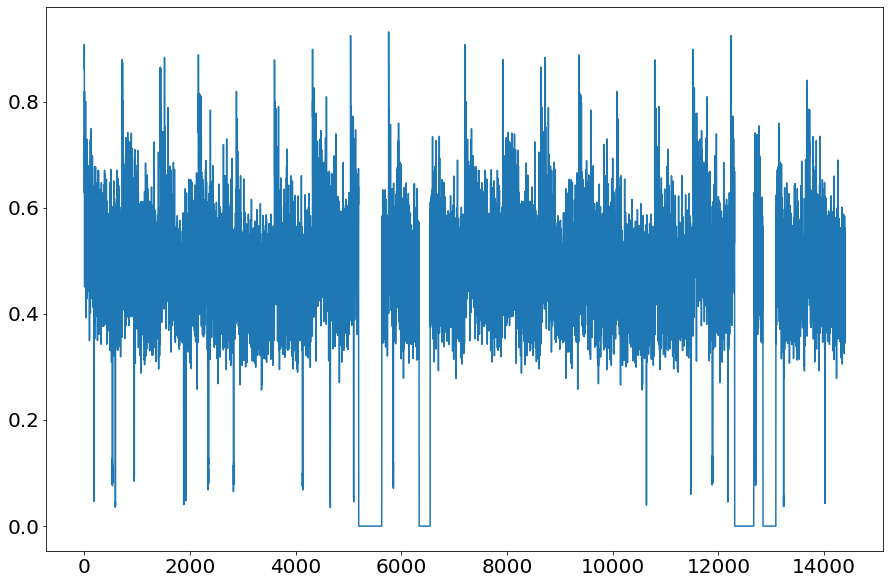

In [32]:
random.seed(45)

lent = df['QoE'].shape[0]

leng1 = [random.randint(1,10) for i in range(10)]
init1 = [random.randint(0,lent) for i in range(10)]


print(init1)
print(leng1)
print('-----------------------------')

leng2 = [random.randint(10,20) for i in range(10)]
init2 = [random.randint(0,lent) for i in range(10)]
print(init2)
print(leng2)
print('-----------------------------')


leng3 = [random.randint(200,500) for i in range(5)]
init3 = [random.randint(0,lent) for i in range(5)]
print(init3)
print(leng3)
print('-----------------------------')

for i in range(0,len(leng1)):
    df['QoE'][init1[i]:init1[i]+leng1[i]] = df['QoE'][init1[i]:init1[i]+leng1[i]] * 0.1;
    #print(df['QoE'][init1[i]:init1[i]+leng1[i]])
    
for i in range(0,len(leng2)):
    df['QoE'][init2[i]:init2[i]+leng2[i]] = df['QoE'][init2[i]:init2[i]+leng2[i]] * 0.2;
    #print(df['QoE'][init2[i]:init2[i]+leng2[i]])
    
for i in range(0,len(leng3)):
    df['QoE'][init3[i]:init3[i]+leng3[i]] = df['QoE'][init3[i]:init3[i]+leng3[i]] * 0;
    #print(df['QoE'][init2[i]:init2[i]+leng2[i]])

    
fig = plt.figure(figsize=(15,10))
plt.plot(var_x,df['QoE'])
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

[8856, 6313, 6355, 8249, 6647, 5213, 11781, 7026, 8752, 12664]
[2, 4, 3, 5, 2, 3, 5, 2, 6, 8]
-----------------------------
[13728, 3665, 859, 6203, 3796, 1451, 8224, 10556, 12238, 7015]
[20, 10, 20, 14, 10, 13, 18, 10, 19, 17]
-----------------------------
[5007, 5411, 13589, 136, 1755]
[299, 316, 305, 410, 287]
-----------------------------


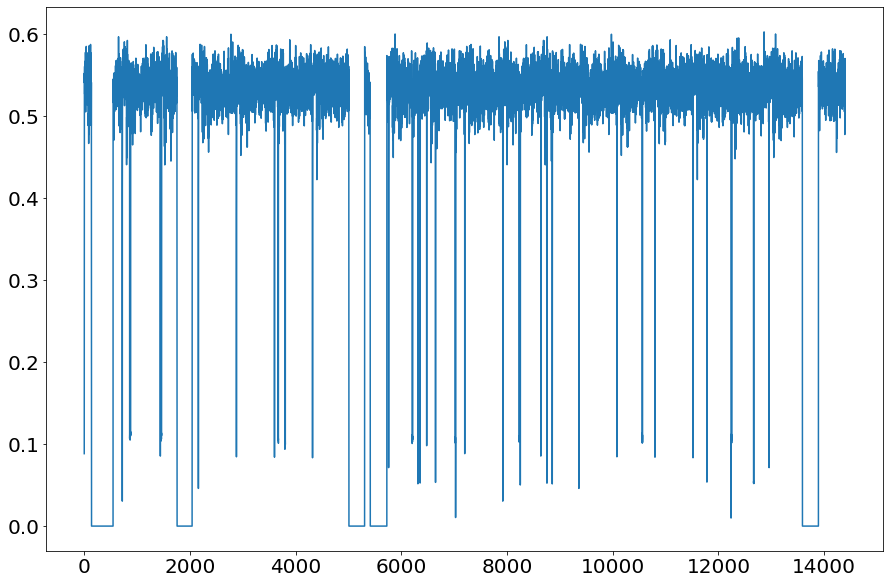

In [33]:
random.seed(55)

lent = df['QoD'].shape[0]

leng1 = [random.randint(1,10) for i in range(10)]
init1 = [random.randint(0,lent) for i in range(10)]


print(init1)
print(leng1)
print('-----------------------------')

leng2 = [random.randint(10,20) for i in range(10)]
init2 = [random.randint(0,lent) for i in range(10)]
print(init2)
print(leng2)
print('-----------------------------')


leng3 = [random.randint(200,500) for i in range(5)]
init3 = [random.randint(0,lent) for i in range(5)]
print(init3)
print(leng3)
print('-----------------------------')

for i in range(0,len(leng1)):
    df['QoD'][init1[i]:init1[i]+leng1[i]] = df['QoD'][init1[i]:init1[i]+leng1[i]] * 0.1;
    #print(df['QoD'][init1[i]:init1[i]+leng1[i]])
    
for i in range(0,len(leng2)):
    df['QoD'][init2[i]:init2[i]+leng2[i]] = df['QoD'][init2[i]:init2[i]+leng2[i]] * 0.2;
    #print(df['QoD'][init2[i]:init2[i]+leng2[i]])
    
for i in range(0,len(leng3)):
    df['QoD'][init3[i]:init3[i]+leng3[i]] = df['QoD'][init3[i]:init3[i]+leng3[i]] * 0;
    #print(df['QoD'][init2[i]:init2[i]+leng2[i]])

    
fig = plt.figure(figsize=(15,10))
plt.plot(var_x,df['QoD'])
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

[5552, 13531, 10477, 7151, 3695, 1179, 9190, 7653, 4326, 3224]
[7, 5, 5, 9, 4, 8, 8, 9, 8, 9]
-----------------------------
[13498, 2043, 2245, 11307, 5743, 6021, 9452, 10688, 6004, 10119]
[20, 17, 19, 10, 14, 11, 12, 18, 12, 20]
-----------------------------
[818, 11462, 2505, 12440, 340]
[318, 316, 403, 430, 443]
-----------------------------


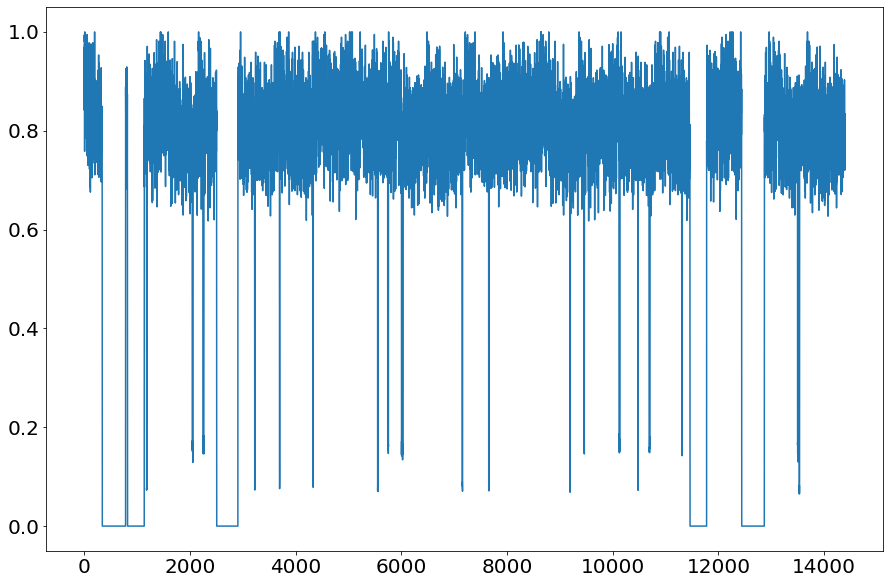

In [34]:
random.seed(65)

lent = df['QoI'].shape[0]

leng1 = [random.randint(1,10) for i in range(10)]
init1 = [random.randint(0,lent) for i in range(10)]


print(init1)
print(leng1)
print('-----------------------------')

leng2 = [random.randint(10,20) for i in range(10)]
init2 = [random.randint(0,lent) for i in range(10)]
print(init2)
print(leng2)
print('-----------------------------')


leng3 = [random.randint(200,500) for i in range(5)]
init3 = [random.randint(0,lent) for i in range(5)]
print(init3)
print(leng3)
print('-----------------------------')

for i in range(0,len(leng1)):
    df['QoI'][init1[i]:init1[i]+leng1[i]] = df['QoI'][init1[i]:init1[i]+leng1[i]] * 0.1;
    #print(df['QoI'][init1[i]:init1[i]+leng1[i]])
    
for i in range(0,len(leng2)):
    df['QoI'][init2[i]:init2[i]+leng2[i]] = df['QoI'][init2[i]:init2[i]+leng2[i]] * 0.2;
    #print(df['QoI'][init2[i]:init2[i]+leng2[i]])
    
for i in range(0,len(leng3)):
    df['QoI'][init3[i]:init3[i]+leng3[i]] = df['QoI'][init3[i]:init3[i]+leng3[i]] * 0;
    #print(df['QoI'][init2[i]:init2[i]+leng2[i]])

    
fig = plt.figure(figsize=(15,10))
plt.plot(var_x,df['QoI'])
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

[1372, 12409, 4115, 4498, 8135, 11796, 14111, 10886, 5696, 9939]
[8, 10, 7, 8, 1, 9, 8, 6, 2, 6]
-----------------------------
[11077, 3254, 2157, 3219, 14372, 2351, 4950, 8072, 9782, 2760]
[20, 17, 14, 16, 10, 16, 18, 19, 20, 17]
-----------------------------
[910, 4427, 5306, 3189, 949]
[437, 209, 357, 230, 235]
-----------------------------


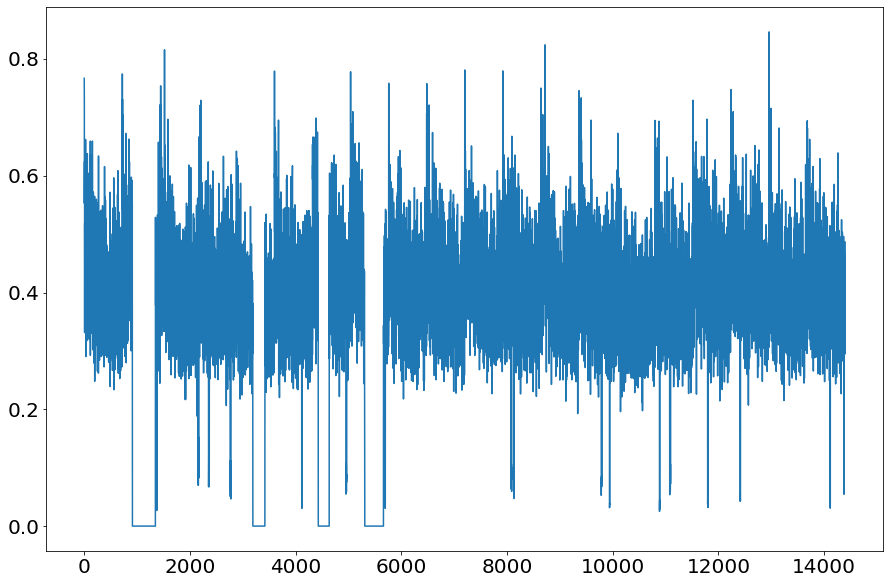

In [35]:
random.seed(75)

df['QC'] = pd.read_csv('../csv/S2_Rural_QC.csv')
lent = df['QC'].shape[0]

leng1 = [random.randint(1,10) for i in range(10)]
init1 = [random.randint(0,lent) for i in range(10)]


print(init1)
print(leng1)
print('-----------------------------')

leng2 = [random.randint(10,20) for i in range(10)]
init2 = [random.randint(0,lent) for i in range(10)]
print(init2)
print(leng2)
print('-----------------------------')


leng3 = [random.randint(200,500) for i in range(5)]
init3 = [random.randint(0,lent) for i in range(5)]
print(init3)
print(leng3)
print('-----------------------------')

for i in range(0,len(leng1)):
    df['QC'][init1[i]:init1[i]+leng1[i]] = df['QC'][init1[i]:init1[i]+leng1[i]] * 0.1;
    #print(df['QoE'][init1[i]:init1[i]+leng1[i]])
    
for i in range(0,len(leng2)):
    df['QC'][init2[i]:init2[i]+leng2[i]] = df['QC'][init2[i]:init2[i]+leng2[i]] * 0.2;
    #print(df['QoE'][init2[i]:init2[i]+leng2[i]])
    
for i in range(0,len(leng3)):
    df['QC'][init3[i]:init3[i]+leng3[i]] = df['QC'][init3[i]:init3[i]+leng3[i]] * 0;
    #print(df['QoE'][init2[i]:init2[i]+leng2[i]])

    
fig = plt.figure(figsize=(15,10))
plt.plot(var_x,df['QC'])
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

In [36]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)
 


In [37]:
from sklearn.model_selection import train_test_split

# choose a number of time steps
n_steps = 5
# split into samples
X_QoE, y_QoE = split_sequence(df['QoE'], n_steps)
# summarize the data
#for i in range(len(X)):
#	print(X[i], y[i])
    


In [38]:
n_features = 1
X_QoE = X_QoE.reshape((X_QoE.shape[0], X_QoE.shape[1], n_features))
#print(X_QoE)
# define model
model_QoE = Sequential()
model_QoE.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model_QoE.add(Dense(1))
model_QoE.compile(optimizer='sgd', loss='mean_squared_error')
# split test/train
X_train_QoE, X_test_QoE, y_train_QoE, y_test_QoE = train_test_split(X_QoE, y_QoE, test_size=0.25, shuffle=False, random_state=42)
# fit model
history_QoE = model_QoE.fit(X_train_QoE, y_train_QoE, epochs=150, verbose=1,batch_size=2000*n_steps)
# demonstrate prediction

yhat_QoE = model_QoE.predict(X_test_QoE, verbose=0)
print([yhat_QoE,y_test_QoE])

Epoch 1/150
2/2 [==============================] - 0s 24ms/step - loss: 0.2732
Epoch 2/150
2/2 [==============================] - 0s 36ms/step - loss: 0.2391
Epoch 3/150
2/2 [==============================] - 0s 23ms/step - loss: 0.2101
Epoch 4/150
2/2 [==============================] - 0s 16ms/step - loss: 0.1847
Epoch 5/150
2/2 [==============================] - 0s 15ms/step - loss: 0.1628
Epoch 6/150
2/2 [==============================] - 0s 20ms/step - loss: 0.1438
Epoch 7/150
2/2 [==============================] - 0s 18ms/step - loss: 0.1273
Epoch 8/150
2/2 [==============================] - 0s 12ms/step - loss: 0.1132
Epoch 9/150
2/2 [==============================] - 0s 16ms/step - loss: 0.1009
Epoch 10/150
2/2 [==============================] - 0s 10ms/step - loss: 0.0903
Epoch 11/150
2/2 [==============================] - 0s 10ms/step - loss: 0.0811
Epoch 12/150
2/2 [==============================] - 0s 11ms/step - loss: 0.0732
Epoch 13/150
2/2 [==============================]

2/2 [==============================] - 0s 12ms/step - loss: 0.0168
Epoch 104/150
2/2 [==============================] - 0s 12ms/step - loss: 0.0167
Epoch 105/150
2/2 [==============================] - 0s 12ms/step - loss: 0.0167
Epoch 106/150
2/2 [==============================] - 0s 9ms/step - loss: 0.0167
Epoch 107/150
2/2 [==============================] - 0s 12ms/step - loss: 0.0167
Epoch 108/150
2/2 [==============================] - 0s 13ms/step - loss: 0.0167
Epoch 109/150
2/2 [==============================] - 0s 11ms/step - loss: 0.0167
Epoch 110/150
2/2 [==============================] - 0s 12ms/step - loss: 0.0167
Epoch 111/150
2/2 [==============================] - 0s 10ms/step - loss: 0.0166
Epoch 112/150
2/2 [==============================] - 0s 13ms/step - loss: 0.0166
Epoch 113/150
2/2 [==============================] - 0s 12ms/step - loss: 0.0166
Epoch 114/150
2/2 [==============================] - 0s 15ms/step - loss: 0.0166
Epoch 115/150
2/2 [========================

dict_keys(['loss'])


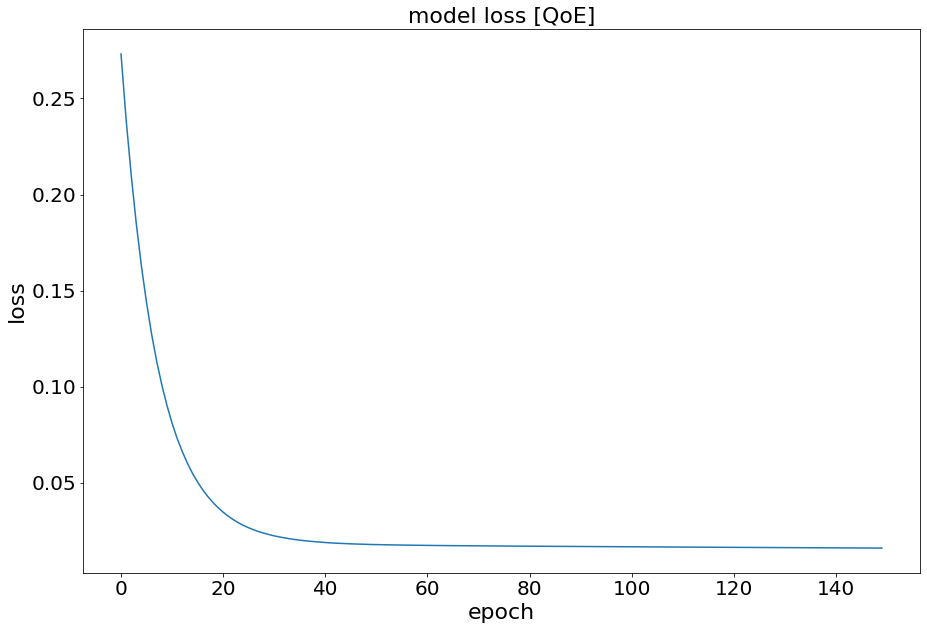

In [39]:
# list all data in history
print(history_QoE.history.keys())
fig = plt.figure(figsize=(15,10))
# summarize history for loss
plt.plot(history_QoE.history['loss'])
plt.title('model loss [QoE]', fontsize=22)
plt.ylabel('loss', fontsize=22)
plt.xlabel('epoch', fontsize=22)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Rural-model_QoE_loss-mse.png', format='png',bbox_inches='tight')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

          yhat    y_test      diff
0     0.468232  0.845081  0.376849
1     0.478691  0.813059  0.334368
2     0.490651  0.660434  0.169782
3     0.494267  0.800199  0.305932
4     0.507555  0.695017  0.187462
...        ...       ...       ...
3594  0.457971  0.344773  0.113198
3595  0.453977  0.557016  0.103038
3596  0.459515  0.436116  0.023399
3597  0.458099  0.456852  0.001247
3598  0.460002  0.560795  0.100794

[3599 rows x 3 columns]


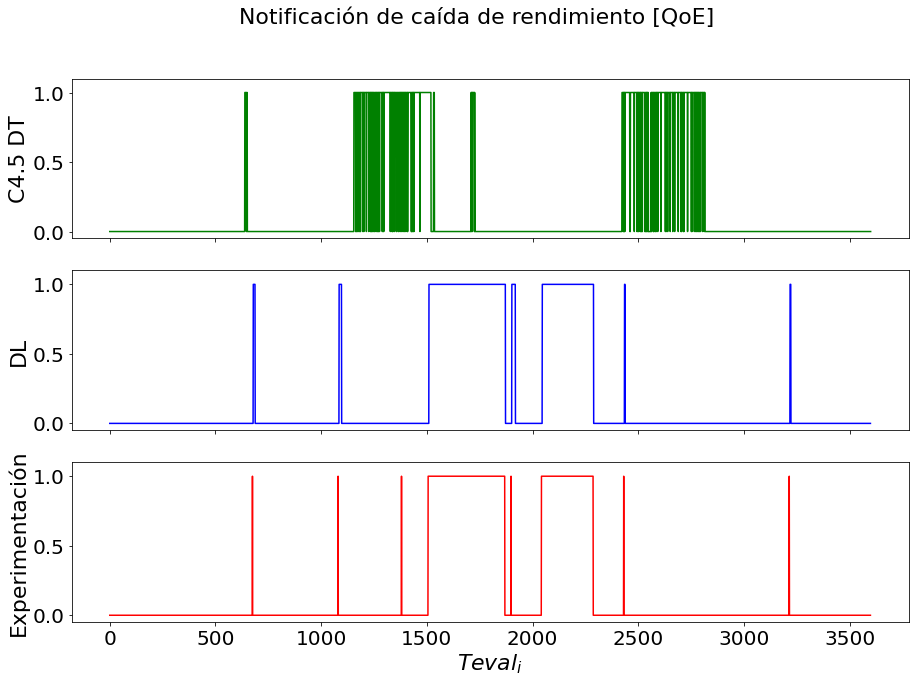

In [40]:
res_QoE = pd.DataFrame()
res_QoE['yhat'] = yhat_QoE.ravel()
res_QoE['y_test'] = y_test_QoE
res_QoE['diff'] = abs(res_QoE['yhat']-res_QoE['y_test'])
#res = np.concatenate((yhat.ravel(),y_test),axis=1)
print(res_QoE)

min = 0
count = 0;
notif = []
notif2 = []

th = 0.5


for i in range(0,res_QoE['yhat'].shape[0]):
    #print([res_QoE['yhat'][i], res_QoE['y_test'][i]])
    if (i==0):
        notif.append(0)
        notif2.append(0)
    else:
        if(res_QoE['yhat'][i] < res_QoE['y_test'][i-1]*th or res_QoE['yhat'][i] == res_QoE['yhat'][i-1] or res_QoE['yhat'][i] <= 0.4):
            notif.append(1)
        else:
            notif.append(0)
        
        if(res_QoE['y_test'][i] < res_QoE['y_test'][i-1]*th or res_QoE['y_test'][i] == res_QoE['y_test'][i-1]):
            notif2.append(1)
        else:
            notif2.append(0)    



x = len(notif)
x = np.linspace(0.0, x-1, num=x)


fig2, ((ax1), (ax2), (ax3)) = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=False, figsize=(15,10))
fig2.suptitle('Notificación de caída de rendimiento [QoE]',fontsize=22)
#fig2.xlabel('$Teval_i$' ,fontsize=22)

ax1.plot(notif_paper,c='g')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax1.set_ylabel('C4.5 DT', fontsize=22)
ax1.set_ylim([-0.05,1.1])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

ax2.plot(x,notif,c='b')
#ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('DL', fontsize=22,rotation=90)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

ax3.plot(x,notif2,c='r')
ax3.set_xlabel('$Teval_i$' ,fontsize=22)
ax3.set_ylabel('Experimentación', fontsize=22,rotation=90)
ax3.set_ylim([-0.05,1.1])
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Rural-NotificationsQoE.png', format='png',bbox_inches='tight')

plt.show()


In [41]:
from sklearn.metrics import confusion_matrix, classification_report
tn, fp, fn, tp = confusion_matrix(notif2, notif).ravel()
print('TN: %i'%tn)
print('FP: %i'%fp)
print('FN: %i'%fn)
print('TP: %i'%tp)
print(classification_report(notif2, notif))

TN: 2935
FP: 50
FN: 14
TP: 600
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2985
           1       0.92      0.98      0.95       614

    accuracy                           0.98      3599
   macro avg       0.96      0.98      0.97      3599
weighted avg       0.98      0.98      0.98      3599



In [42]:


notif_paper2 = notif_paper.pop()



tn, fp, fn, tp = confusion_matrix(notif2, notif_paper).ravel()
print('TN: %i'%tn)
print('FP: %i'%fp)
print('FN: %i'%fn)
print('TP: %i'%tp)
print(classification_report(notif2, notif_paper))

TN: 2354
FP: 631
FN: 580
TP: 34
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      2985
           1       0.05      0.06      0.05       614

    accuracy                           0.66      3599
   macro avg       0.43      0.42      0.42      3599
weighted avg       0.67      0.66      0.67      3599



In [43]:
print('************Diferencias Testing [QoE] **************')
print(max(res_QoE['diff']))
#print(min(res_QoE['diff']))
print(sum(res_QoE['diff'])/len(res_QoE))
print()

************Diferencias Testing [QoE] **************
0.48452842235565186
0.1202753164707094



In [44]:
# choose a number of time steps
n_steps = 5
# split into samples
X_QoI, y_QoI = split_sequence(df['QoI'], n_steps)
# summarize the data
#for i in range(len(X)):
#	print(X[i], y[i])

In [45]:
n_features = 1
X_QoI = X_QoI.reshape((X_QoI.shape[0], X_QoI.shape[1], n_features))
#print(X_QoI)
# define model
model_QoI = Sequential()
model_QoI.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model_QoI.add(Dense(1))
model_QoI.compile(optimizer='sgd', loss='mean_squared_error')
# split test/train
X_train_QoI, X_test_QoI, y_train_QoI, y_test_QoI = train_test_split(X_QoI, y_QoI, test_size=0.25, shuffle=False, random_state=42)
# fit model
history_QoI = model_QoI.fit(X_train_QoI, y_train_QoI, epochs=150, verbose=1,batch_size=2000*n_steps)
# demonstrate prediction

yhat_QoI = model_QoI.predict(X_test_QoI, verbose=0)
print([yhat_QoI,y_test_QoI])

Epoch 1/150
2/2 [==============================] - 0s 25ms/step - loss: 0.5030
Epoch 2/150
2/2 [==============================] - 0s 22ms/step - loss: 0.4339
Epoch 3/150
2/2 [==============================] - 0s 17ms/step - loss: 0.3744
Epoch 4/150
2/2 [==============================] - 0s 24ms/step - loss: 0.3241
Epoch 5/150
2/2 [==============================] - 0s 27ms/step - loss: 0.2815
Epoch 6/150
2/2 [==============================] - 0s 13ms/step - loss: 0.2446
Epoch 7/150
2/2 [==============================] - 0s 12ms/step - loss: 0.2132
Epoch 8/150
2/2 [==============================] - 0s 11ms/step - loss: 0.1869
Epoch 9/150
2/2 [==============================] - 0s 9ms/step - loss: 0.1649
Epoch 10/150
2/2 [==============================] - 0s 24ms/step - loss: 0.1460
Epoch 11/150
2/2 [==============================] - 0s 17ms/step - loss: 0.1298
Epoch 12/150
2/2 [==============================] - 0s 21ms/step - loss: 0.1159
Epoch 13/150
2/2 [==============================] 

2/2 [==============================] - 0s 13ms/step - loss: 0.0256
Epoch 104/150
2/2 [==============================] - 0s 11ms/step - loss: 0.0255
Epoch 105/150
2/2 [==============================] - 0s 12ms/step - loss: 0.0255
Epoch 106/150
2/2 [==============================] - 0s 9ms/step - loss: 0.0254
Epoch 107/150
2/2 [==============================] - 0s 11ms/step - loss: 0.0253
Epoch 108/150
2/2 [==============================] - 0s 12ms/step - loss: 0.0252
Epoch 109/150
2/2 [==============================] - 0s 11ms/step - loss: 0.0252
Epoch 110/150
2/2 [==============================] - 0s 11ms/step - loss: 0.0251
Epoch 111/150
2/2 [==============================] - 0s 13ms/step - loss: 0.0250
Epoch 112/150
2/2 [==============================] - 0s 10ms/step - loss: 0.0249
Epoch 113/150
2/2 [==============================] - 0s 10ms/step - loss: 0.0249
Epoch 114/150
2/2 [==============================] - 0s 10ms/step - loss: 0.0248
Epoch 115/150
2/2 [========================

dict_keys(['loss'])


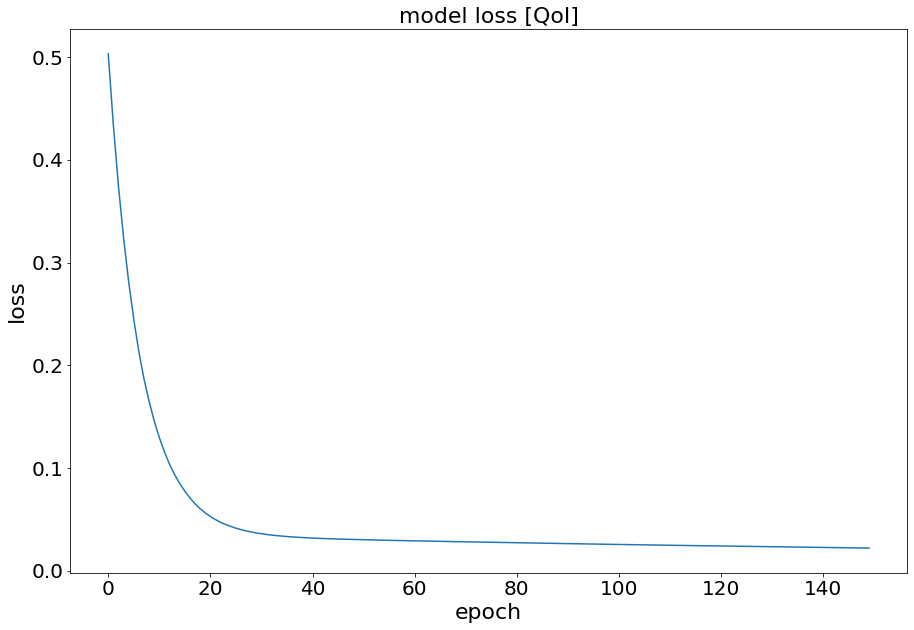

In [46]:
# list all data in history
print(history_QoI.history.keys())
fig = plt.figure(figsize=(15,10))
# summarize history for loss
plt.plot(history_QoI.history['loss'])
plt.title('model loss [QoI]',fontsize=22)
plt.ylabel('loss',fontsize=22)
plt.xlabel('epoch',fontsize=22)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Rural-model_QoI_loss-mse.png', format='png',bbox_inches='tight')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

          yhat    y_test      diff
0     0.795051  0.966711  0.171660
1     0.814361  0.856230  0.041869
2     0.822143  0.870640  0.048498
3     0.821617  0.966711  0.145094
4     0.837104  0.961171  0.124067
...        ...       ...       ...
3594  0.758592  0.720848  0.037744
3595  0.757672  0.799322  0.041650
3596  0.755994  0.810954  0.054959
3597  0.757971  0.789392  0.031421
3598  0.760021  0.834075  0.074054

[3599 rows x 3 columns]


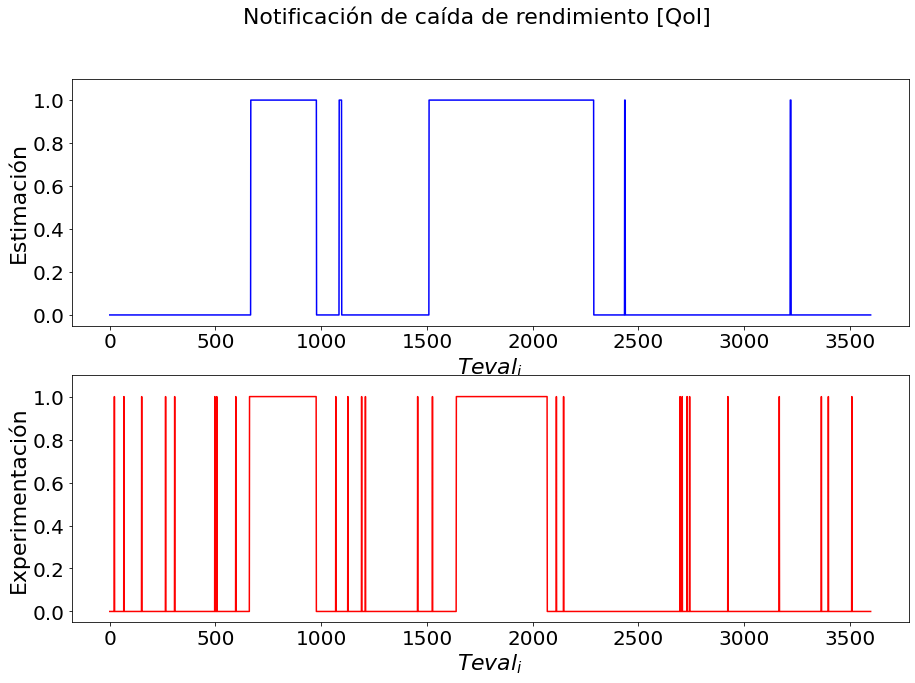

In [47]:
res_QoI = pd.DataFrame()
res_QoI['yhat'] = yhat_QoI.ravel()
res_QoI['y_test'] = y_test_QoI
res_QoI['diff'] = abs(res_QoI['yhat']-res_QoI['y_test'])
#res = np.concatenate((yhat.ravel(),y_test),axis=1)
print(res_QoI)

notif = []
notif2 = []

th = 0.5


for i in range(0,res_QoI['yhat'].shape[0]):
    #print([res_QoI['yhat'][i], res_QoI['y_test'][i]])
    if (i==0):
        notif.append(0)
        notif2.append(0)
    else:
        if(res_QoI['yhat'][i] < res_QoI['y_test'][i-1]*th or res_QoI['yhat'][i] == res_QoI['yhat'][i-1] or res_QoE['yhat'][i] <= 0.4):
            notif.append(1)
        else:
            notif.append(0)
        
        if(res_QoI['y_test'][i] < res_QoI['y_test'][i-1]*th or res_QoI['y_test'][i] == res_QoI['y_test'][i-1]):
            notif2.append(1)
        else:
            notif2.append(0)    



x = len(notif)
x = np.linspace(0.0, x-1, num=x)


fig2, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(15,10))
fig2.suptitle('Notificación de caída de rendimiento [QoI]',fontsize=22)
ax1.plot(x,notif,c='b')
ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax1.set_ylabel('Estimación', fontsize=22)
ax1.set_ylim([-0.05,1.1])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

ax2.plot(x,notif2,c='r')
ax2.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('Experimentación', fontsize=22)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Rural-NotificationsQoI.png', format='png',bbox_inches='tight')

plt.show()


In [48]:
tn, fp, fn, tp = confusion_matrix(notif2, notif).ravel()
print('TN: %i'%tn)
print('FP: %i'%fp)
print('FN: %i'%fn)
print('TP: %i'%tp)
print(classification_report(notif2, notif))

TN: 2462
FP: 366
FN: 28
TP: 743
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      2828
           1       0.67      0.96      0.79       771

    accuracy                           0.89      3599
   macro avg       0.83      0.92      0.86      3599
weighted avg       0.92      0.89      0.90      3599



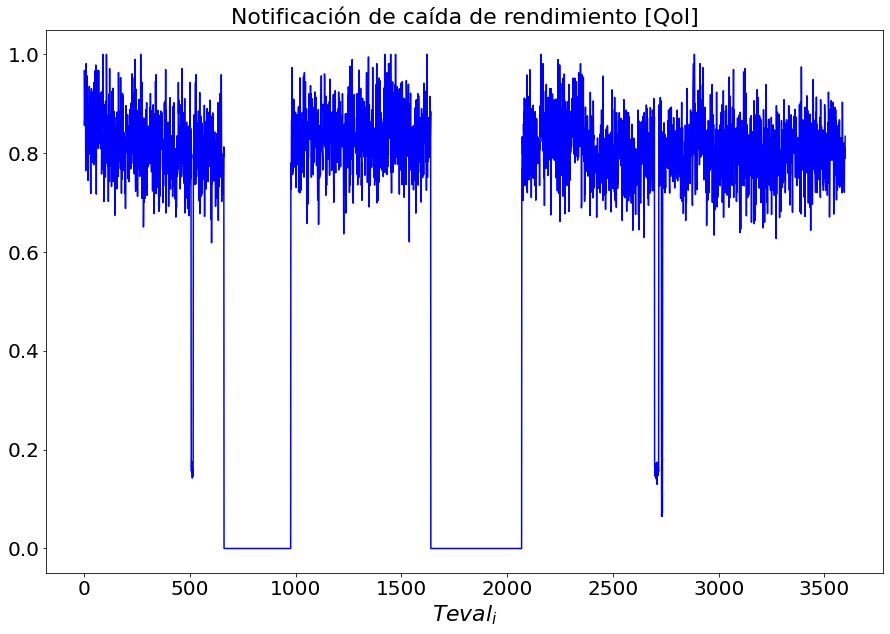

In [49]:
fig = plt.figure(figsize=(15,10))
plt.plot(res_QoI['y_test'],c='b')
#plt.plot(c_v)
plt.title('Notificación de caída de rendimiento [QoI]',fontsize=22)
plt.xlabel('$Teval_i$',fontsize=22)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [50]:
res_QoI = pd.DataFrame()
res_QoI['yhat'] = yhat_QoI.ravel()
res_QoI['y_test'] = y_test_QoI
res_QoI['diff'] = abs(res_QoI['yhat']-res_QoI['y_test'])
#res = np.concatenate((yhat.ravel(),y_test),axis=1)
print(res_QoI)

          yhat    y_test      diff
0     0.795051  0.966711  0.171660
1     0.814361  0.856230  0.041869
2     0.822143  0.870640  0.048498
3     0.821617  0.966711  0.145094
4     0.837104  0.961171  0.124067
...        ...       ...       ...
3594  0.758592  0.720848  0.037744
3595  0.757672  0.799322  0.041650
3596  0.755994  0.810954  0.054959
3597  0.757971  0.789392  0.031421
3598  0.760021  0.834075  0.074054

[3599 rows x 3 columns]


In [51]:
print('************Diferencias Testing [QoI] **************')
print(max(res_QoI['diff']))
#print(min(res_QoI['diff']))
print(sum(res_QoI['diff'])/len(res_QoI))
print()

************Diferencias Testing [QoI] **************
0.8025082945823669
0.12499993774077557



In [52]:
# choose a number of time steps
n_steps = 5
# split into samples
X_QoD, y_QoD = split_sequence(df['QoD'], n_steps)
# summarize the data
#for i in range(len(X)):
#	print(X_QoD[i], y_QoD[i])

In [53]:
n_features = 1
X_QoD = X_QoD.reshape((X_QoD.shape[0], X_QoD.shape[1], n_features))
#print(X_QoD)
# define model
model_QoD = Sequential()
model_QoD.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model_QoD.add(Dense(1))
model_QoD.compile(optimizer='sgd', loss='mean_squared_error')
# split test/train
X_train_QoD, X_test_QoD, y_train_QoD, y_test_QoD = train_test_split(X_QoD, y_QoD, test_size=0.25, shuffle=False, random_state=42)
# fit model
history_QoD = model_QoD.fit(X_train_QoD, y_train_QoD, epochs=150, verbose=1,batch_size=2000*n_steps)
# demonstrate prediction

yhat_QoD = model_QoD.predict(X_test_QoD, verbose=0)
#print([yhat_QoD,y_test_QoD])


Epoch 1/150
2/2 [==============================] - 0s 17ms/step - loss: 0.2066
Epoch 2/150
2/2 [==============================] - 0s 11ms/step - loss: 0.1858
Epoch 3/150
2/2 [==============================] - 0s 12ms/step - loss: 0.1674
Epoch 4/150
2/2 [==============================] - 0s 12ms/step - loss: 0.1508
Epoch 5/150
2/2 [==============================] - 0s 10ms/step - loss: 0.1363
Epoch 6/150
2/2 [==============================] - 0s 11ms/step - loss: 0.1234
Epoch 7/150
2/2 [==============================] - 0s 11ms/step - loss: 0.1119
Epoch 8/150
2/2 [==============================] - 0s 23ms/step - loss: 0.1017
Epoch 9/150
2/2 [==============================] - 0s 24ms/step - loss: 0.0926
Epoch 10/150
2/2 [==============================] - 0s 19ms/step - loss: 0.0845
Epoch 11/150
2/2 [==============================] - 0s 21ms/step - loss: 0.0773
Epoch 12/150
2/2 [==============================] - 0s 22ms/step - loss: 0.0708
Epoch 13/150
2/2 [==============================]

2/2 [==============================] - 0s 11ms/step - loss: 0.0163
Epoch 104/150
2/2 [==============================] - 0s 9ms/step - loss: 0.0162
Epoch 105/150
2/2 [==============================] - 0s 10ms/step - loss: 0.0162
Epoch 106/150
2/2 [==============================] - 0s 9ms/step - loss: 0.0162
Epoch 107/150
2/2 [==============================] - 0s 10ms/step - loss: 0.0161
Epoch 108/150
2/2 [==============================] - 0s 11ms/step - loss: 0.0161
Epoch 109/150
2/2 [==============================] - 0s 10ms/step - loss: 0.0160
Epoch 110/150
2/2 [==============================] - 0s 10ms/step - loss: 0.0160
Epoch 111/150
2/2 [==============================] - 0s 10ms/step - loss: 0.0160
Epoch 112/150
2/2 [==============================] - 0s 10ms/step - loss: 0.0159
Epoch 113/150
2/2 [==============================] - 0s 10ms/step - loss: 0.0159
Epoch 114/150
2/2 [==============================] - 0s 10ms/step - loss: 0.0158
Epoch 115/150
2/2 [=========================

In [54]:
yhat_QoD = model_QoD.predict(X_test_QoD, verbose=0)
print([yhat_QoD,y_test_QoD])

[array([[0.46099016],
       [0.46008056],
       [0.45880222],
       ...,
       [0.48894942],
       [0.4922985 ],
       [0.49625733]], dtype=float32), array([0.40589295, 0.53950617, 0.51138782, ..., 0.57053041, 0.53435826,
       0.54837743])]


dict_keys(['loss'])


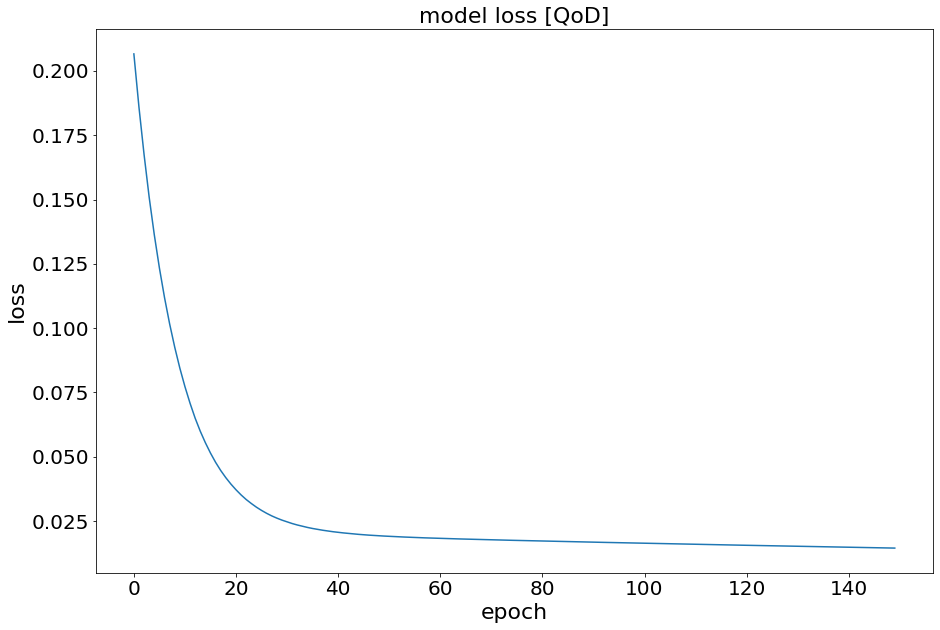

In [55]:
# list all data in history
print(history_QoD.history.keys())
fig = plt.figure(figsize=(15,10))
# summarize history for loss
plt.plot(history_QoD.history['loss'])
plt.title('model loss [QoD]',fontsize=22)
plt.ylabel('loss',fontsize=22)
plt.xlabel('epoch',fontsize=22)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Rural-model_QoD_loss-mean_squared_error.png', format='png',bbox_inches='tight')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

          yhat    y_test      diff
0     0.460990  0.405893  0.055097
1     0.460081  0.539506  0.079426
2     0.458802  0.511388  0.052586
3     0.455998  0.542577  0.086579
4     0.448652  0.524009  0.075357
...        ...       ...       ...
3594  0.491548  0.528148  0.036600
3595  0.490973  0.526532  0.035559
3596  0.488949  0.570530  0.081581
3597  0.492299  0.534358  0.042060
3598  0.496257  0.548377  0.052120

[3599 rows x 3 columns]


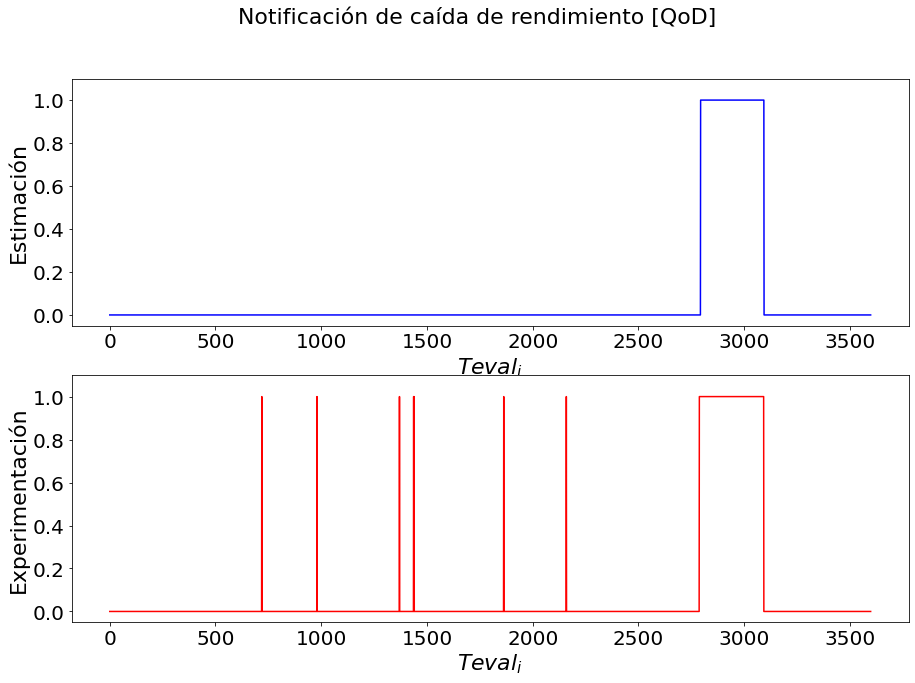

In [56]:
res_QoD = pd.DataFrame()
res_QoD['yhat'] = yhat_QoD.ravel()
res_QoD['y_test'] = y_test_QoD
res_QoD['diff'] = abs(res_QoD['yhat']-res_QoD['y_test'])
#res = np.concatenate((yhat.ravel(),y_test),axis=1)
print(res_QoD)

min = 0
count = 0;
notif = []
notif2 = []

th = 0.5


for i in range(0,res_QoD['yhat'].shape[0]):
    #print([res_QoD['yhat'][i], res_QoD['y_test'][i]])
    if (i==0):
        notif.append(0)
        notif2.append(0)
    else:
        if(res_QoD['yhat'][i] < res_QoD['y_test'][i-1]*th or res_QoD['yhat'][i] == res_QoD['yhat'][i-1]):
            notif.append(1)
        else:
            notif.append(0)
        
        if(res_QoD['y_test'][i] < res_QoD['y_test'][i-1]*th or res_QoD['y_test'][i] == res_QoD['y_test'][i-1]):
            notif2.append(1)
        else:
            notif2.append(0)    



x = len(notif)
x = np.linspace(0.0, x-1, num=x)


fig2, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(15,10))
fig2.suptitle('Notificación de caída de rendimiento [QoD]',fontsize=22)
ax1.plot(x,notif,c='b')
ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax1.set_ylabel('Estimación', fontsize=22)
ax1.set_ylim([-0.05,1.1])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

ax2.plot(x,notif2,c='r')
ax2.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('Experimentación', fontsize=22)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Rural-NotificationsQoD.png', format='png',bbox_inches='tight')

plt.show()

In [57]:
tn, fp, fn, tp = confusion_matrix(notif2, notif).ravel()
print('TN: %i'%tn)
print('FP: %i'%fp)
print('FN: %i'%fn)
print('TP: %i'%tp)
print(classification_report(notif2, notif))

TN: 3286
FP: 1
FN: 13
TP: 299
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3287
           1       1.00      0.96      0.98       312

    accuracy                           1.00      3599
   macro avg       1.00      0.98      0.99      3599
weighted avg       1.00      1.00      1.00      3599



In [58]:
print('************Diferencias Testing [QoD] **************')
print(max(res_QoD['diff']))
#print(min(res_QoD['diff']))
print(sum(res_QoD['diff'])/len(res_QoD))
print()

************Diferencias Testing [QoD] **************
0.4963722825050354
0.06626660015649134



In [59]:
# choose a number of time steps
n_steps = 5
# split into samples
X_QC, y_QC = split_sequence(df['QC'], n_steps)
# summarize the data
#for i in range(len(X)):
#	print(X_QC[i], y_QC[i])

In [60]:
n_features = 1
X_QC = X_QC.reshape((X_QC.shape[0], X_QC.shape[1], n_features))
#print(X_QC)
# define model
model_QC = Sequential()
model_QC.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model_QC.add(Dense(1))
model_QC.compile(optimizer='sgd', loss='mean_squared_error')
# split test/train
X_train_QC, X_test_QC, y_train_QC, y_test_QC = train_test_split(X_QC, y_QC, test_size=0.25, shuffle=False, random_state=42)
# fit model
history_QC = model_QC.fit(X_train_QC, y_train_QC, epochs=150, verbose=1,batch_size=2000*n_steps)
# demonstrate prediction

yhat_QC = model_QC.predict(X_test_QC, verbose=0)
#print([yhat_QC,y_test_QC])


Epoch 1/150
2/2 [==============================] - 0s 13ms/step - loss: 0.1697
Epoch 2/150
2/2 [==============================] - 0s 10ms/step - loss: 0.1511
Epoch 3/150
2/2 [==============================] - 0s 11ms/step - loss: 0.1347
Epoch 4/150
2/2 [==============================] - 0s 11ms/step - loss: 0.1202
Epoch 5/150
2/2 [==============================] - 0s 11ms/step - loss: 0.1078
Epoch 6/150
2/2 [==============================] - 0s 8ms/step - loss: 0.0969
Epoch 7/150
2/2 [==============================] - 0s 11ms/step - loss: 0.0872
Epoch 8/150
2/2 [==============================] - 0s 10ms/step - loss: 0.0788
Epoch 9/150
2/2 [==============================] - 0s 10ms/step - loss: 0.0715
Epoch 10/150
2/2 [==============================] - 0s 10ms/step - loss: 0.0651
Epoch 11/150
2/2 [==============================] - 0s 9ms/step - loss: 0.0595
Epoch 12/150
2/2 [==============================] - 0s 9ms/step - loss: 0.0546
Epoch 13/150
2/2 [==============================] - 

2/2 [==============================] - 0s 10ms/step - loss: 0.0154
Epoch 104/150
2/2 [==============================] - 0s 15ms/step - loss: 0.0154
Epoch 105/150
2/2 [==============================] - 0s 10ms/step - loss: 0.0154
Epoch 106/150
2/2 [==============================] - 0s 9ms/step - loss: 0.0153
Epoch 107/150
2/2 [==============================] - 0s 8ms/step - loss: 0.0153
Epoch 108/150
2/2 [==============================] - 0s 10ms/step - loss: 0.0153
Epoch 109/150
2/2 [==============================] - 0s 10ms/step - loss: 0.0153
Epoch 110/150
2/2 [==============================] - 0s 9ms/step - loss: 0.0152
Epoch 111/150
2/2 [==============================] - 0s 9ms/step - loss: 0.0152
Epoch 112/150
2/2 [==============================] - 0s 8ms/step - loss: 0.0152
Epoch 113/150
2/2 [==============================] - 0s 9ms/step - loss: 0.0151
Epoch 114/150
2/2 [==============================] - 0s 11ms/step - loss: 0.0151
Epoch 115/150
2/2 [=============================

In [61]:
yhat_QC = model_QC.predict(X_test_QC, verbose=0)
print([yhat_QC,y_test_QC])

[array([[0.37116927],
       [0.38251114],
       [0.3927229 ],
       ...,
       [0.3675    ],
       [0.365337  ],
       [0.36684623]], dtype=float32), array([0.67019948, 0.68704342, 0.55937971, ..., 0.35313716, 0.37271052,
       0.48629423])]


dict_keys(['loss'])


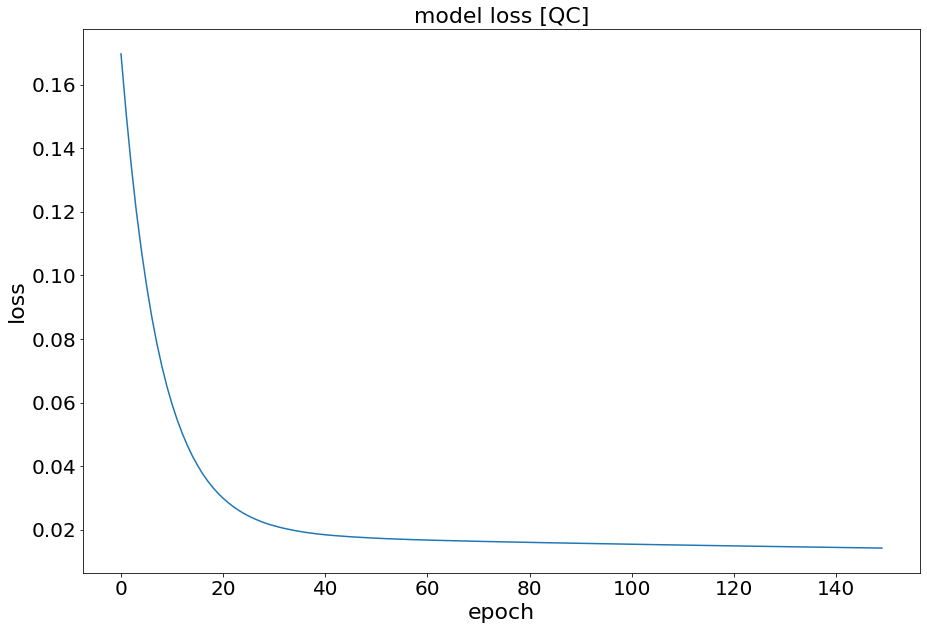

In [62]:
# list all data in history
print(history_QC.history.keys())
fig = plt.figure(figsize=(15,10))
# summarize history for loss
plt.plot(history_QC.history['loss'])
plt.title('model loss [QC]',fontsize=22)
plt.ylabel('loss',fontsize=22)
plt.xlabel('epoch',fontsize=22)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Rural-model_QC_loss-mean_squared_error.png', format='png',bbox_inches='tight')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

          yhat    y_test      diff
0     0.371169  0.670199  0.299030
1     0.382511  0.687043  0.304532
2     0.392723  0.559380  0.166657
3     0.394600  0.564117  0.169517
4     0.403777  0.602454  0.198677
...        ...       ...       ...
3594  0.371646  0.294726  0.076920
3595  0.366855  0.399296  0.032441
3596  0.367500  0.353137  0.014363
3597  0.365337  0.372711  0.007374
3598  0.366846  0.486294  0.119448

[3599 rows x 3 columns]


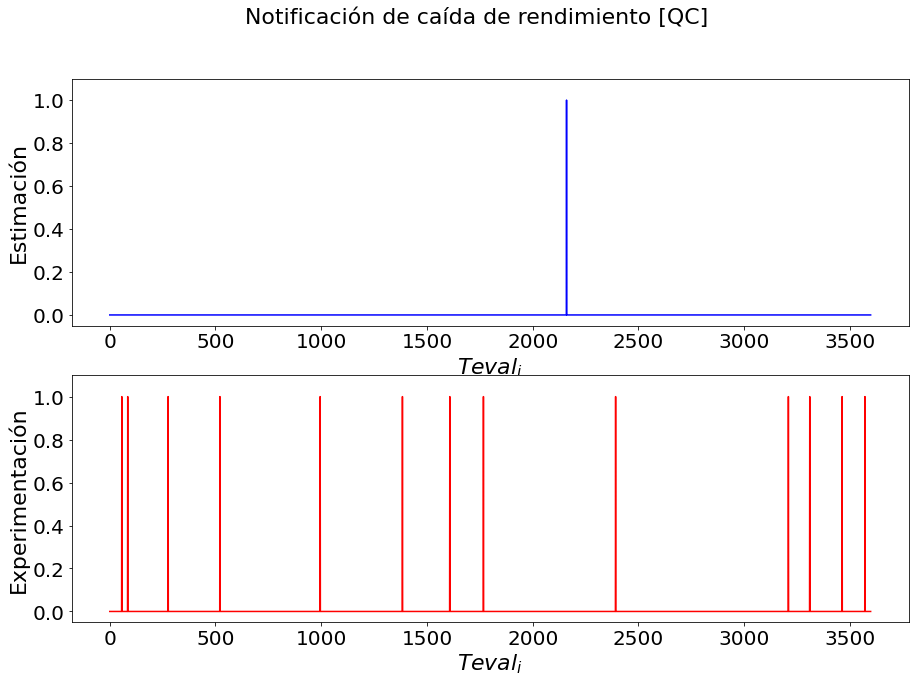

In [68]:
res_QC = pd.DataFrame()
res_QC['yhat'] = yhat_QC.ravel()
res_QC['y_test'] = y_test_QC
res_QC['diff'] = abs(res_QC['yhat']-res_QC['y_test'])
#res = np.concatenate((yhat.ravel(),y_test),axis=1)
print(res_QC)

min = 0
count = 0;
notif = []
notif2 = []

th = 0.5


for i in range(0,res_QC['yhat'].shape[0]):
    #print([res_QC['yhat'][i], res_QC['y_test'][i]])
    if (i==0):
        notif.append(0)
        notif2.append(0)
    else:
        if(res_QC['yhat'][i] < res_QC['y_test'][i-1]*th or res_QC['yhat'][i] == res_QC['yhat'][i-1]):
            notif.append(1)
        else:
            notif.append(0)
        
        if(res_QC['y_test'][i] < res_QC['y_test'][i-1]*th or res_QC['y_test'][i] == res_QC['y_test'][i-1]):
            notif2.append(1)
        else:
            notif2.append(0)    



x = len(notif)
x = np.linspace(0.0, x-1, num=x)


fig2, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(15,10))
fig2.suptitle('Notificación de caída de rendimiento [QC]',fontsize=22)
ax1.plot(x,notif,c='b')
ax1.set_xlabel('$Teval_i$' ,fontsize=22)
ax1.set_ylabel('Estimación', fontsize=22)
ax1.set_ylim([-0.05,1.1])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

ax2.plot(x,notif2,c='r')
ax2.set_xlabel('$Teval_i$' ,fontsize=22)
ax2.set_ylabel('Experimentación', fontsize=22)
ax2.set_ylim([-0.05,1.1])
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
plt.savefig('../figure/S2Rural-NotificationsQC.png', format='png',bbox_inches='tight')

plt.show()

In [69]:
tn, fp, fn, tp = confusion_matrix(notif2, notif).ravel()
print('TN: %i'%tn)
print('FP: %i'%fp)
print('FN: %i'%fn)
print('TP: %i'%tp)
print(classification_report(notif2, notif))

TN: 3585
FP: 1
FN: 13
TP: 0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3586
           1       0.00      0.00      0.00        13

    accuracy                           1.00      3599
   macro avg       0.50      0.50      0.50      3599
weighted avg       0.99      1.00      0.99      3599

